In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There is no missing data

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
df_cat = df.copy()
df_cat = df_cat[["sex", "children", "smoker", "region"]].astype("category")
df_cat.dtypes

sex         category
children    category
smoker      category
region      category
dtype: object

In [6]:
# df_ = df.copy()
df[["sex", "children", "smoker", "region"]] = df_cat

In [7]:
df.dtypes

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
expenses     float64
dtype: object

In [8]:
cat_cols = df[["sex", "children", "smoker", "region"]]
cat_cols = cat_cols.apply(lambda x: x.cat.codes)

df[["sex", "children", "smoker", "region"]] = cat_cols
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


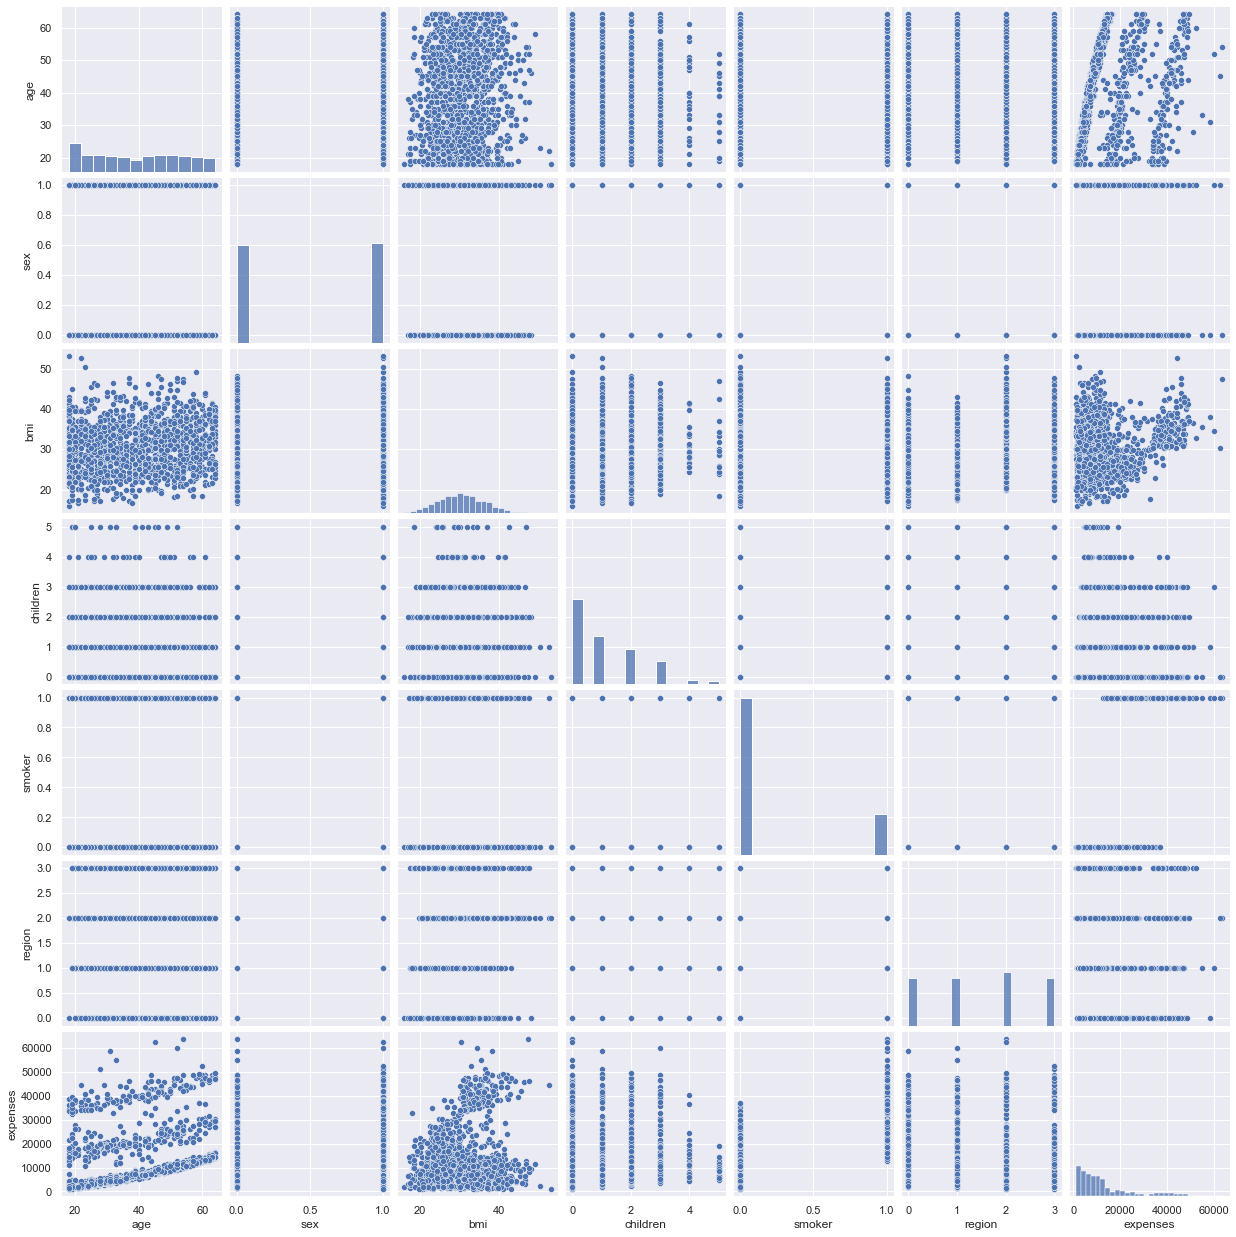

In [9]:
sns.set_theme(style="darkgrid")
sns.pairplot(df)

In [10]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

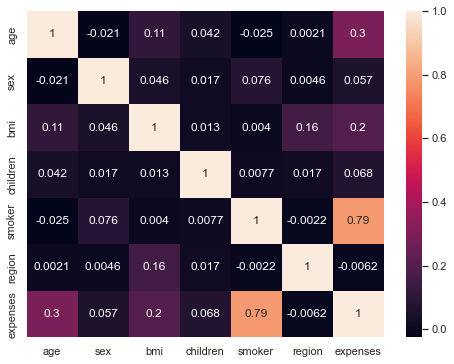

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

Covariates with significant relationship with response ("expenses") are: age, bmi, and smoker

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

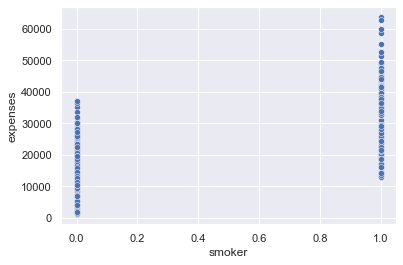

In [12]:
sns.scatterplot(x="smoker", y="expenses", data=df)#, hue="smoker")

<AxesSubplot:xlabel='age', ylabel='expenses'>

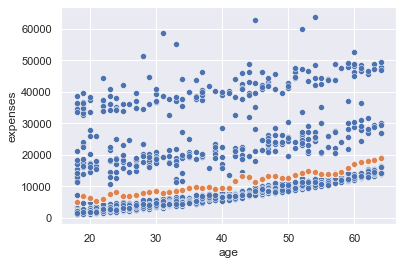

In [13]:
sm_age, sm_exp = sm_lowess(df.expenses, df.age, frac=1/10, it=1, return_sorted = True).T
sns.scatterplot(x="age", y="expenses", data=df)
sns.scatterplot(x=sm_age, y=sm_exp)

In [14]:
# sns.lmplot(x='age', y='expenses', data=df, lowess=True, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

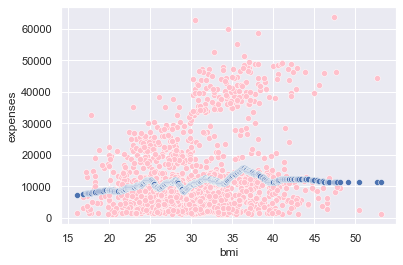

In [15]:
sm_bmi, sm_exp = sm_lowess(df.expenses, df.bmi, frac=1/10, it=1, return_sorted = True).T
sns.scatterplot(x="bmi", y="expenses", data=df, color="pink")
sns.scatterplot(x=sm_bmi, y=sm_exp)

/Users/sanchitvj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

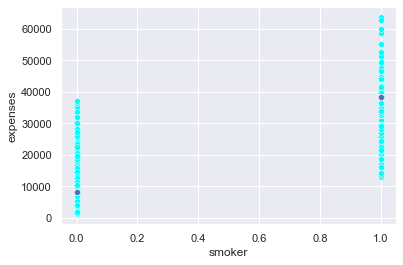

In [16]:
sm_smoker, sm_exp = sm_lowess(df.expenses, df.smoker, frac=1/10, it=3, return_sorted = True).T
sns.scatterplot(x="smoker", y="expenses", data=df, color="cyan")
sns.scatterplot(x=sm_smoker, y=sm_exp)

In [17]:
# sns.lmplot(x='smoker', y='expenses', data=df, lowess=True)#, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})

The relationship is non-linear.

In [18]:
x = df[["age", "bmi", "smoker", "sex", "children", "region"]]
X = sm.add_constant(x)
y = df["expenses"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [19]:
model = sm.OLS(y_train, x_train)
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     482.3
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          1.58e-290
Time:                        11:05:07   Log-Likelihood:                -10170.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     996   BIC:                         2.039e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.165e+04   1136.333    -10.256      0.000   -1.39e+04   -9424.341
age          257.3612     13.835     18.603      0.000     230.213     284.509
bmi          333.6693     33.461      9.972      0.000     268.006     399.332
smoker      2.367e+04    490.110     48.300      0.000    2.27e+04    2.46e+04
sex          -24.9864    391.241     -0.064      0.949    -792.738     742.765
children     505.7515    159.595      3.169      0.002     192.570     818.933
region      -397.9762    180.074     -2.210      0.027    -751.345     -44.608
==============================================================================
Omnibus:                      228.772   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.552
Skew:                           1.252   Prob(JB):                    1.01e-110
Kurtosis:                       5.418   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# model_fit.mse_total

y_train_pred = model_fit.predict(x_train)
root_mse_train = rmse(y_train_pred, y_train)
print("Mean squared error for training with all covariates is: ", root_mse_train**2)

Mean squared error for training with all covariates is:  37577758.936844595


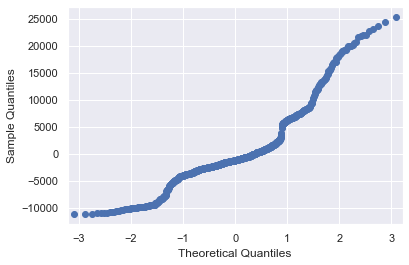

In [21]:
res = model_fit.resid # residuals 
fig = sm.qqplot(res)
plt.show()

In [22]:
res.mean()

-1.8257902113856342e-11

Above value is very very small can be considered almost zero. So assumption of zero mean is correct.

In [23]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid 
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

Text(0, 0.5, 'Residuals')

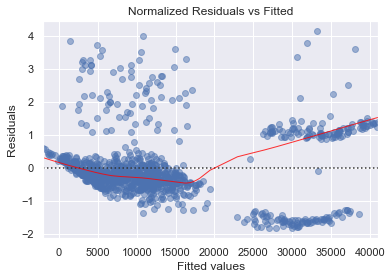

In [24]:
data_train= pd.concat([x_train, y_train], axis=1)
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=model_norm_residuals, data=data_train, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}) 
plot_lm_1.axes[0].set_title('Normalized Residuals vs Fitted') 
plot_lm_1.axes[0].set_xlabel('Fitted values') 
plot_lm_1.axes[0].set_ylabel('Residuals')

The red line in above curve shows that distribution of data points, i.e., there is increasing/decreasing values of residuals.

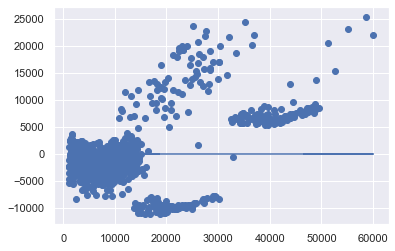

In [25]:
plt.scatter(y_train, model_residuals)
plt.plot(y_train, [0]*len(y_train))

In [26]:
test_outlier = model_fit.outlier_test()
outliers = test_outlier[test_outlier['bonf(p)'] < 0.05]
outlier_ls = list(outliers.index.values)
outliers
# test_outlier

,student_resid,unadj_p,bonf(p)
577,4.179138,0.000032,0.03193


These is one outlier

In [27]:
ypred = model_fit.predict(x_test)

root_mse_test = rmse(ypred, y_test)
print("Mean squared error for testing with all covariates is: ", root_mse_test**2)

Mean squared error for testing with all covariates is:  33546291.11678006


### Using covariates with significant relationship with response

In [28]:
df_rel = df[["age", "bmi", "smoker", "expenses"]]
df_rel.head(3)

,age,bmi,smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46


In [29]:
x = df_rel[["age", "bmi", "smoker"]]
X = sm.add_constant(x)
y = df_rel["expenses"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [30]:
model = sm.OLS(y_train, x_train)
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     948.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          8.77e-292
Time:                        11:05:09   Log-Likelihood:                -10178.
No. Observations:                1003   AIC:                         2.036e+04
Df Residuals:                     999   BIC:                         2.038e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.154e+04   1119.493    -10.311      0.000   -1.37e+04   -9345.732
age          260.4981     13.878     18.771      0.000     233.265     287.732
bmi          323.8902     33.230      9.747      0.000     258.681     389.099
smoker      2.368e+04    491.935     48.134      0.000    2.27e+04    2.46e+04
==============================================================================
Omnibus:                      232.983   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.107
Skew:                           1.268   Prob(JB):                    2.56e-114
Kurtosis:                       5.467   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
y_train_pred = model_fit.predict(x_train)
root_mse_train_2 = rmse(y_train_pred, y_train)
print("Mean squared error for training with selected covariates is: ", root_mse_train_2**2)

Mean squared error for training with selected covariates is:  38124779.74677424


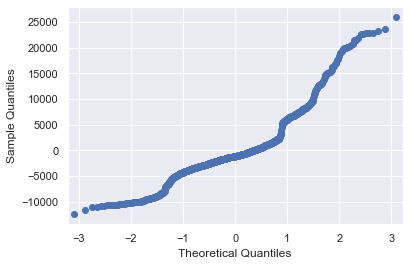

In [32]:
res = model_fit.resid # residuals 
fig = sm.qqplot(res)
plt.show()

In [33]:
res.mean()

-6.820756876107644e-12

Above value is very very small can be considered almost zero. So assumption of zero mean is correct here also.

In [34]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid 
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

Text(0, 0.5, 'Residuals')

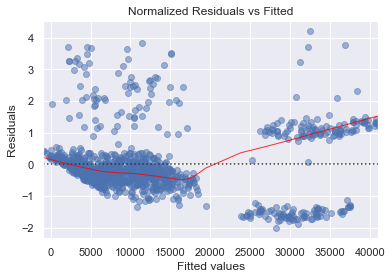

In [35]:
data_train= pd.concat([x_train, y_train], axis=1)
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=model_norm_residuals, data=data_train, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}) 
plot_lm_1.axes[0].set_title('Normalized Residuals vs Fitted') 
plot_lm_1.axes[0].set_xlabel('Fitted values') 
plot_lm_1.axes[0].set_ylabel('Residuals')

The red line in above curve shows that distribution of data points, i.e., there is increasing/decreasing values of residuals.

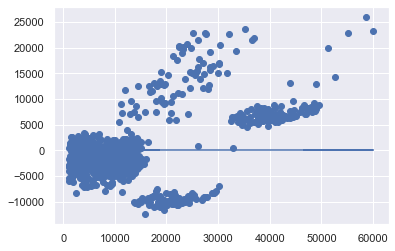

In [36]:
plt.scatter(y_train, model_residuals)
plt.plot(y_train, [0]*len(y_train))

In [37]:
test_outlier = model_fit.outlier_test()
outliers = test_outlier[test_outlier['bonf(p)'] < 0.05]
outlier_ls = list(outliers.index.values)
outlier_ls
# test_outlier
outliers

,student_resid,unadj_p,bonf(p)
577,4.256389,0.000023,0.022802


In [38]:
ypred = model_fit.predict(x_test)

root_mse_test_2 = rmse(ypred, y_test)
print("Mean squared error for training with selected covariates is: ", root_mse_test_2**2)

Mean squared error for training with selected covariates is:  33792396.45724229


### Comparing results

In [39]:
print("For 1st experiment train MSE is: ", root_mse_train**2)
print("For 2nd experiment train MSE is: ", root_mse_train_2**2)
print("\n")
print("For 1st experiment test MSE is: ", root_mse_test**2)
print("For 2nd experiment test MSE is: ", root_mse_test_2**2)
print("\n")
print("AIC for 1st experiment is: 2.035e+04")
print("AIC for 1st experiment is: 2.036e+04")

For 1st experiment train MSE is:  37577758.936844595
For 2nd experiment train MSE is:  38124779.74677424


For 1st experiment test MSE is:  33546291.11678006
For 2nd experiment test MSE is:  33792396.45724229


AIC for 1st experiment is: 2.035e+04
AIC for 1st experiment is: 2.036e+04


From above comparison, we can infer that:
1. Training MSE increased with selected covariates with more significance.
2. Similarly, test MSE is also increased for 2nd experiment.
3. AIC is almost same for both the experiments.